In [1]:
import csv
csv.field_size_limit(2 * 1024 * 1024)

import matplotlib.pyplot as plt

In [25]:
prev= '../../../../snellius/Scripts/adult/1run/Results/'
dataset = 'Adult'
strategy = 'Repr'
strategy_name = 'Representative'
baseline_acc = 0.848
baseline_unf = 0.186

In [10]:
# Create an empty list to store the dictionary entries
data_dict_list = []

numbers = [327]
types = ['accuracy_histories_profiles', 'accuracy_histories_total', 'fairness_histories_profiles', 'fairness_histories_total']

for typ in types:
    print(' type?', typ)
    for number in numbers:
        # Open the CSV file for reading
        file = prev + dataset + strategy + str(number) + 'experiments_' + typ + '_13profiles30000iter_.csv' 


        with open(file, mode='r') as file:
            # Create a CSV reader
            csv_reader = csv.DictReader(file)

            # Iterate over the rows in the CSV file
            for row in csv_reader:
#                 # Append each row (which is a dictionary) to the list
#                 data_dict_list.append(row)

#                 for data_dict in data_dict_list:
                if typ == 'accuracy_histories_profiles':
                    accuracy_histories_profiles = row
                if typ == 'accuracy_histories_total':
                    accuracy_histories_total = row
                if typ == 'fairness_histories_profiles':
                    fairness_histories_profiles = row
                if typ == 'fairness_histories_total':
                    fairness_histories_total = row

 type? accuracy_histories_profiles
 type? accuracy_histories_total
 type? fairness_histories_profiles
 type? fairness_histories_total


In [11]:
print(type(accuracy_histories_total))

<class 'dict'>


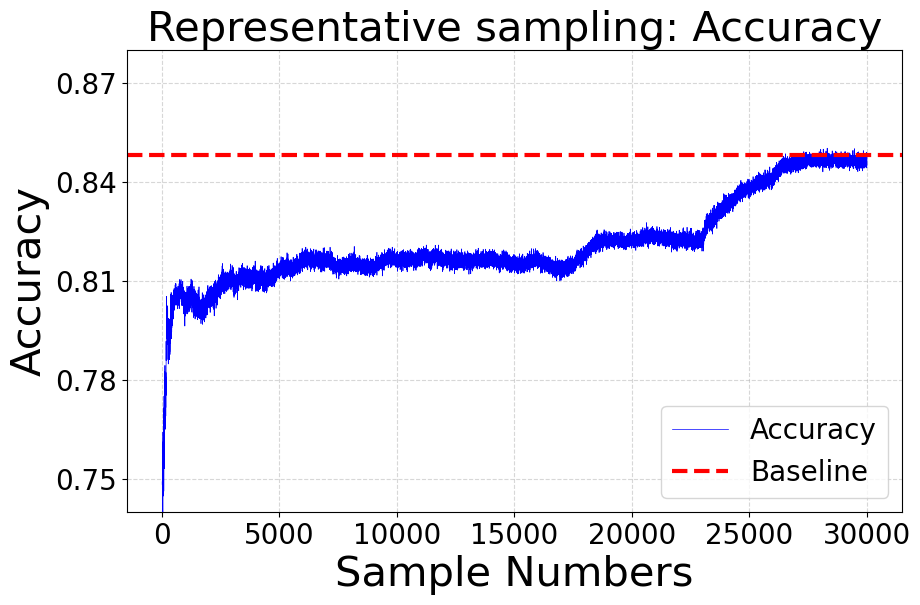

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Sample data
sample_numbers = [i for i in range(8, 30008)]
accuracy = list(accuracy_histories_total.values())
accuracy = [float(entry.strip('[]')) for entry in accuracy]

# Create a plot with improved styling
plt.figure(figsize=(10, 6))  # Enlarge the figure size

# Plot the data with custom line style, color, and label
plt.plot(sample_numbers, accuracy, linestyle='-', color='b', linewidth=0.5, label='Accuracy')  # Adjust line appearance

#plot the baseline
plt.axhline(y=baseline_acc, linestyle='--', color='r', linewidth=3, label='Baseline')  # Dotted red line

# Set the y-limits to your desired range
plt.ylim(0.74, 0.88)

# Add labels and a title with increased font size
plt.xlabel('Sample Numbers', fontsize=30)  # Increase the font size
plt.ylabel('Accuracy', fontsize=30)  # Increase the font size
plt.title(strategy_name+' sampling: Accuracy', fontsize=30)  # Increase the title font size

# Configure the y-axis ticker for better spacing and formatting
# Configure the y-axis ticker for better spacing and formatting
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # Show only integer values on the y-axis and prune small ticks

# Add a legend with increased font size
plt.legend(fontsize=20, loc='lower right')  # Increase the legend font size

# Customize tick labels and font size
plt.xticks(fontsize=20)  # Increase x-axis tick label font size
plt.yticks(fontsize=20)  # Increase y-axis tick label font size
plt.locator_params(axis='y', nbins=5)  # Adjust the number of y-axis ticks as needed

# Set a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


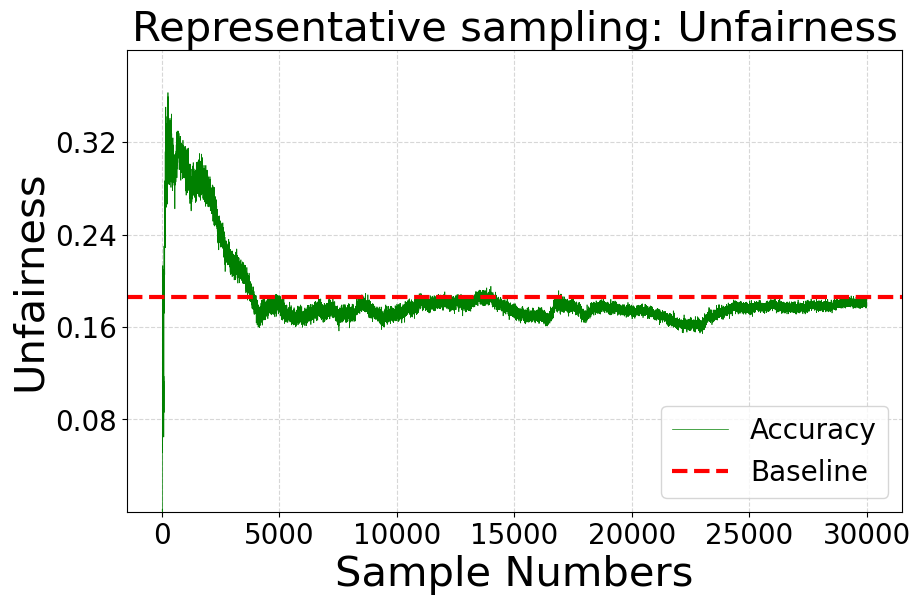

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Sample data
sample_numbers = [i for i in range(8, 30008)]
unfairness = list(fairness_histories_total.values())
unfairness = [float(entry.strip('[]')) for entry in unfairness]

# Create a plot with improved styling
plt.figure(figsize=(10, 6))  # Enlarge the figure size

# Plot the data with custom line style, color, and label
plt.plot(sample_numbers, unfairness, linestyle='-', color='g', linewidth=0.5, label='Accuracy')  # Adjust line appearance

# Plot the baseline
plt.axhline(y=baseline_unf, linestyle='--', color='r', linewidth=3, label='Baseline')  # Dotted red line

# Set the y-limits to your desired range
plt.ylim(0.0, 0.4)

# Add labels and a title with increased font size
plt.xlabel('Sample Numbers', fontsize=30)  # Increase the font size
plt.ylabel('Unfairness', fontsize=30)  # Increase the font size
plt.title(strategy_name+' sampling: Unfairness', fontsize=30)  # Increase the title font size

# Configure the y-axis ticker for better spacing and formatting
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # Show only integer values on the y-axis and prune small ticks

# Set a custom number of ticks on the y-axis
plt.yticks(fontsize=20)  # Increase y-axis tick label font size
plt.xticks(fontsize=20)  # Increase x-axis tick label font size
plt.locator_params(axis='y', nbins=6)  # Adjust the number of y-axis ticks as needed

# Add a legend with increased font size
plt.legend(fontsize=20, loc='lower right')  # Increase the legend font size

# Set a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()
